In [1]:
#!pip install matplotlib

In [2]:
import sys
sys.path.append("../../src/")

import uncertainpy.gradual as grad  

# Stock example

In [10]:
# Define your model
model = grad.semantics.QuadraticEnergyModel()
# Set an approximator
model.approximator = grad.algorithms.RK4(model)
# Set the BAG
model.BAG = grad.BAG("../../bags/BTC_graph.bag")

model.solve(delta=10e-2, epsilon=10e-4, verbose=True, generate_plot=False)


QuadraticEnergyModel, RK4
Time: 7.39999999999999
Argument(name=BTC, weight=0.5, strength=0.0015456530767001876)
Argument(name=Post_1653505733, weight=0.5867350158252835, strength=0.6925378390549685)
Argument(name=Post_1668055308, weight=0.5849670228519559, strength=0.5849670228519559)
Argument(name=Post_1698694468, weight=0.5868556258239865, strength=0.5868556258239865)
Argument(name=Post_1708094260, weight=0.5413143184570957, strength=0.5413143184570957)
Argument(name=Post_1708698888, weight=0.5409420874504733, strength=0.6447190087914089)
Argument(name=Post_1711479042, weight=0.47950083017349243, strength=0.6306741003405244)
Argument(name=Post_1711479186, weight=0.4999810457229614, strength=0.6414030412893433)
Argument(name=Post_1711479958, weight=0.4960530400276184, strength=0.6291834790683147)
Argument(name=Post_1711547188, weight=0.4999997615814209, strength=0.5998227196910504)
Argument(name=Post_1711551207, weight=0.49999308586120605, strength=0.499638212978222)
Argument(name=Pos

0.0009352053740861085

# Acyclic BAGs

For acyclic BAGs, strength values can be computed more efficiently using methods from the Acyclic module

In [11]:
# Iterative computation
model = grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), 
                                              grad.semantics.modular.LinearInfluence(conservativeness=1))
model.BAG = grad.BAG("../../bags/BTC_graph.bag")
model.approximator = grad.algorithms.RK4(model)

model.solve(delta=10e-2, epsilon=10e-4, verbose=False, generate_plot=False)

for arg in model.BAG.arguments.values():
    print((arg.name,arg.strength))

('BTC', 5.597800227278599e-06)
('Post_1653505733', 0.8292591815102183)
('Post_1668055308', 0.5849670228519559)
('Post_1698694468', 0.5868556258239865)
('Post_1708094260', 0.5413143184570957)
('Post_1708698888', 0.7891402672645643)
('Post_1711479042', 0.9664640809295254)
('Post_1711479186', 0.9358750754756974)
('Post_1711479958', 0.8718893288654818)
('Post_1711547188', 0.7458284016554061)
('Post_1711551207', 0.4916666253631294)
('Post_1711839535', 0.016651348553566737)
('Post_1711841847', 0.4996705563092928)
('Post_1711881625', 0.0002866011536538628)
('Post_1711889805', 0.74992372402882)
('Post_1711903403', 0.4998935016402608)
('Post_1711967575', 0.0001368464210502836)
('Post_1711990114', 0.9911374792165601)
('Post_1711998888', 0.9830924222963373)
('Post_1712067101', 0.025439813895223425)
('Post_1712081773', 0.9667587187099425)
('Post_1712170762', 0.9338169111793361)
('Post_1712173426', 0.8677965424638165)
('Post_1712295818', 0.7356330409608566)
('Post_1712327881', 0.4713174756308012)
(

In [12]:
# Computation via Forward Propagation
bag = grad.BAG("../../bags/BTC_graph.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)

for arg in bag.arguments.values():
    print((arg.name,arg.strength))

('BTC', 0.0)
('Post_1653505733', 0.8292618967442766)
('Post_1668055308', 0.5849670228519559)
('Post_1698694468', 0.5868556258239865)
('Post_1708094260', 0.5413143184570957)
('Post_1708698888', 0.789143046023329)
('Post_1711479042', 0.9666643204422471)
('Post_1711479186', 0.935954403983268)
('Post_1711479958', 0.8719136635343485)
('Post_1711547188', 0.7458336955288486)
('Post_1711551207', 0.49166763344945835)
('Post_1711839535', 0.016651135080013525)
('Post_1711841847', 0.49967079017382104)
('Post_1711881625', 0.0002864740429657655)
('Post_1711889805', 0.7499602665192527)
('Post_1711903403', 0.49992273875114174)
('Post_1711967575', 0.00011387675911190935)
('Post_1711990114', 0.9917249775508779)
('Post_1711998888', 0.9834528123816839)
('Post_1712067101', 0.02543491772273751)
('Post_1712081773', 0.966943061357985)
('Post_1712170762', 0.9338911664197038)
('Post_1712173426', 0.8678182830932666)
('Post_1712295818', 0.735637511620466)
('Post_1712327881', 0.47131857264344346)
('Post_1712502546

In [6]:
# if BAG contains cycles, algorithm is not applicable
bag = grad.BAG("../../bags/stock_example.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)
print(strength_values)

Graph contains cycles. Found partial topological order ['4', '5', '3', '2', '1'].
None


# Stock example (with graph)

<module 'matplotlib.pyplot' from 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

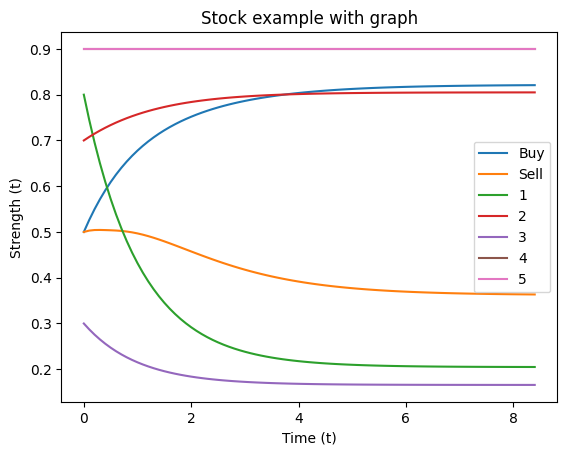

In [7]:
#from uncertainpy.argumentation.graphing import graph

model = grad.semantics.QuadraticEnergyModel()
model.approximator = grad.algorithms.RK4(model)
model.BAG = grad.BAG("../../bags/stock_example.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
grad.plotting.strengthplot(model, DELTA, EPSILON, "Stock example with graph")

# Stock example comparison

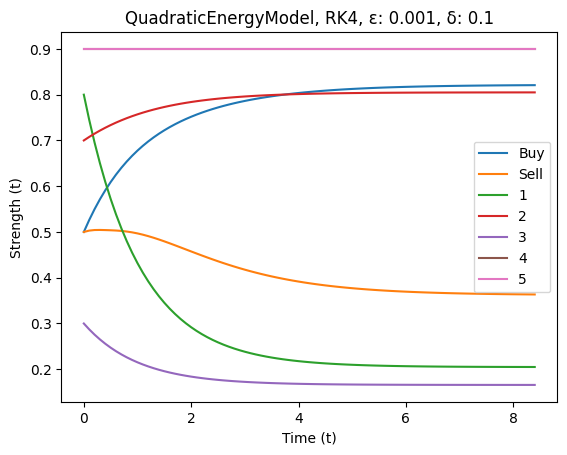

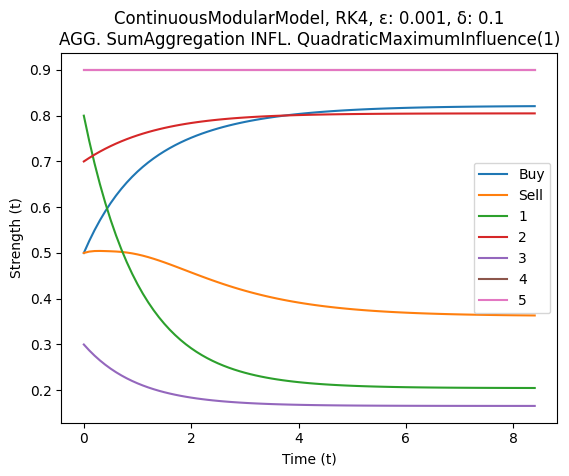

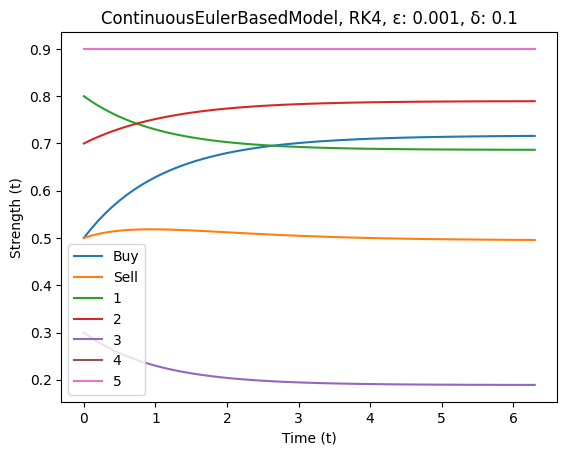

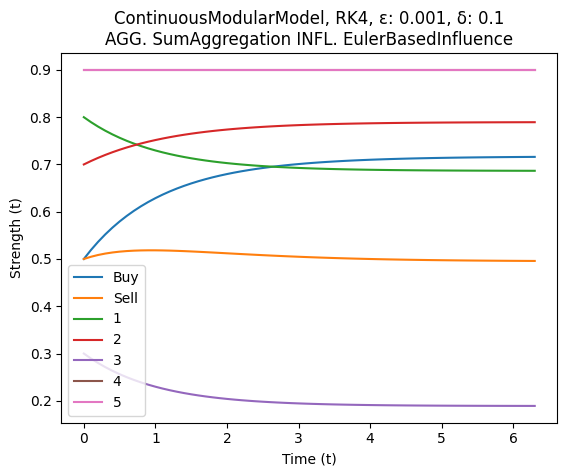

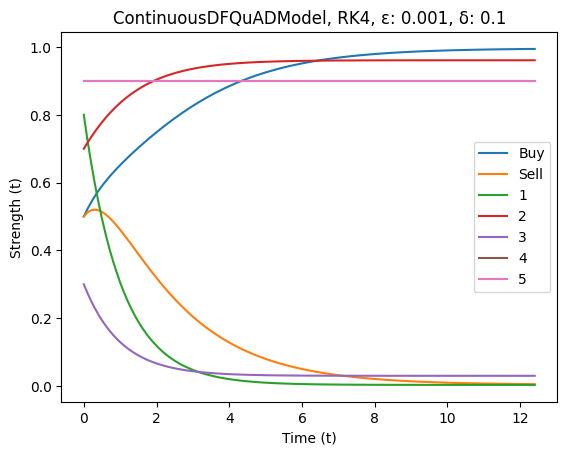

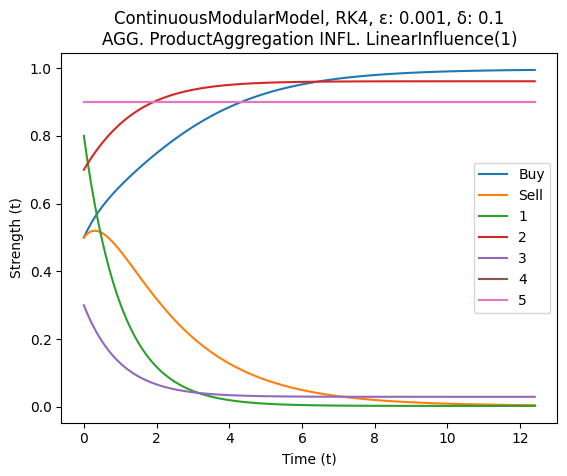

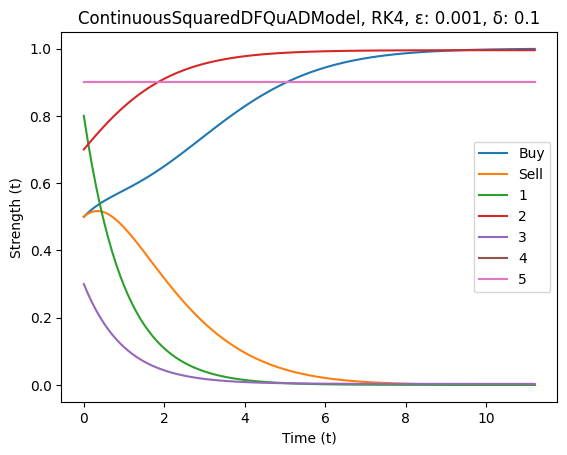

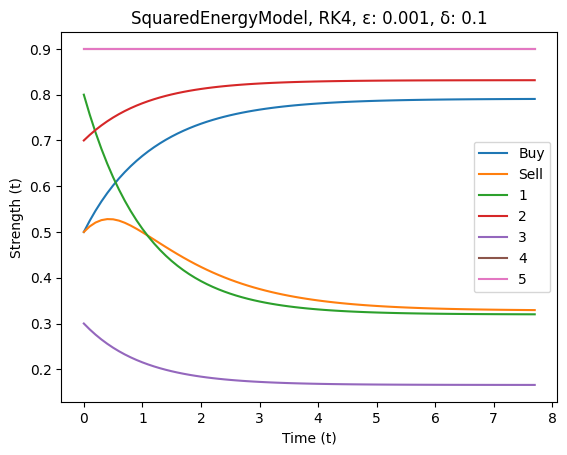

In [8]:
DELTA = 10e-2
EPSILON = 10e-4

models = []
plots = []

models.append(grad.semantics.QuadraticEnergyModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.QuadraticMaximumInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousEulerBasedModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.EulerBasedInfluence()))
models.append(grad.semantics.ContinuousDFQuADModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), grad.semantics.modular.LinearInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousSquaredDFQuADModel())
models.append(grad.semantics.SquaredEnergyModel())

for model in models:
    BAG = grad.BAG("../../bags/stock_example.bag")
    BAG.reset_strength_values()
    model.approximator = grad.algorithms.RK4(model)
    model.BAG = BAG

    result = model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
    title = f"{model.name}, {model.approximator}, ε: {EPSILON}, δ: {DELTA}"
    if model.aggregation is not None:
        title += f"\nAGG. {model.aggregation}"
    if model.influence is not None:
        title += f" INFL. {model.influence}"

    plots.append(grad.plotting.strengthplot(model, DELTA, EPSILON, title))

for plot in plots:
    plot.show()


# Cycles 

QuadraticEnergyModel, RK4
Time: 58.50000000000056
Argument(name=A, weight=1, strength=0.13207533031881255)
Argument(name=B0, weight=0, strength=0.01650111554282822)
Argument(name=C0, weight=0, strength=0.025578304880260305)
Argument(name=C1, weight=0, strength=0.025578304880260305)
Argument(name=C2, weight=0, strength=0.025578304880260305)
Argument(name=C3, weight=0, strength=0.025578304880260305)
Argument(name=C4, weight=0, strength=0.025578304880260305)
Argument(name=C5, weight=0, strength=0.025578304880260305)
Argument(name=C6, weight=0, strength=0.025578304880260305)
Argument(name=C7, weight=0, strength=0.025578304880260305)
Argument(name=C8, weight=0, strength=0.025578304880260305)
Argument(name=C9, weight=0, strength=0.025578304880260305)
Argument(name=B1, weight=0, strength=0.01650111554282822)
Argument(name=B2, weight=0, strength=0.01650111554282822)
Argument(name=B3, weight=0, strength=0.01650111554282822)
Argument(name=B4, weight=0, strength=0.01650111554282822)
Argument(name

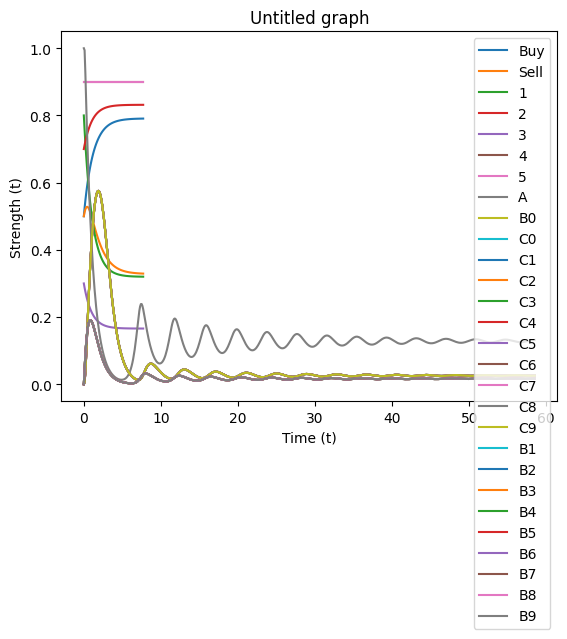

In [9]:
DELTA = 10e-2
EPSILON = 10e-4
N = 10

model = grad.semantics.QuadraticEnergyModel()
BAG = grad.BAG()

a = grad.Argument("A", 1)
b = []
for i in range(N):
    b.append(grad.Argument(f"B{i}", 0))

c = []
for i in range(N):
    c.append(grad.Argument(f"C{i}", 0))

for i in range(N):
    BAG.add_support(a, b[i])
    for j in range(N):
        BAG.add_support(b[i], c[j])
        BAG.add_attack(c[j], a)

model.approximator = grad.algorithms.RK4(model)
model.BAG = BAG
result = model.solve(DELTA, EPSILON, True, True)

plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()